# Introducción a las redes neuronales con TensorFlow y Keras

## Resulto por: Ronie Martínez

#### Trabajo presentado como actividad propuesta para la asignatura "Sistemas Cognitivos Artificiales"

En este primer trabajo, vamos a utilizar una red neuronal para clasificar imágenes de prendas de ropa. Para ello, utilizaremos Keras con TensorFlow.

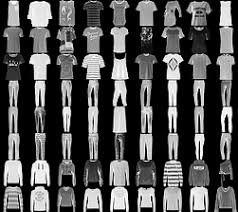

El dataset a utilizar es Fashion MNIST, un problema sencillo con imágenes pequeñas de ropa, pero más interesante que el dataset de MNIST. Puedes consultar más información sobre el dataset en [este enlace](https://github.com/zalandoresearch/fashion-mnist).

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas cells si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, **asegúrate de que los resultados de ejecutar tu código han quedado guardados** (por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch).

In [1]:
import numpy as np
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import tensorflow as tf

import matplotlib.pyplot as plt

Using TensorFlow backend.


Primero, vamos a obtener los datos. Por suerte para nosotros, estos pueden ser descargados directamente desde Keras, por lo que no tendremos que preocuparnos de tratar con ficheros.

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0

## 1. Información sobre el dataset

Una vez tenemos los datos cargados en memoria, vamos a obtener información sobre los mismos.

**Pregunta 1.1 *(0.5 puntos)*** ¿Cuántas imágenes hay de *training* y de *test*? ¿Qué tamaño tienen las imágenes?

In [4]:
# Training set
print("Dimensiones del x_train: ", x_train.shape)
print("Dimensiones del y_train: ", y_train.shape)

# Test set
print("Dimensiones del x_test: ", x_test.shape)
print("Dimensiones del y_test: ", y_test.shape)

Dimensiones del x_train:  (60000, 28, 28)
Dimensiones del y_train:  (60000,)
Dimensiones del x_test:  (10000, 28, 28)
Dimensiones del y_test:  (10000,)


El training set contiene 60000 imágenes de dimensión 28x28 cada una.

El test set contiene 10000 imágenes de dimensión 28x28 cada una.

Ambos sets tienen una etiqueta asociada en el vector 'y' que define en qué categoría está clasificado el ejemplo.

**Pregunta 1.2 *(0.5 puntos)*** Realizar una exploración de las variables que contienen los datos. Describir en qué consiste un example del dataset (qué información se guarda en cada imagen) y describir qué contiene la información en y.

C:\Users\rsmartinez\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


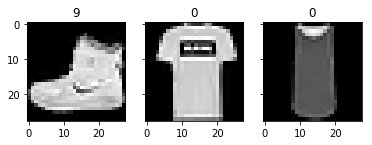

In [5]:
# Impresión de los 3 primeros ejemplos del train set
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(6,2), 
                                    sharex=True, sharey=True)
ejem = 0
ax1.imshow(x_train[ejem], cmap='gray')
ax2.imshow(x_train[ejem+1], cmap='gray')
ax3.imshow(x_train[ejem+2], cmap='gray')
# Se imprime el valor de 'y' asociado (categoría)
ax1.set_title(y_train[ejem])
ax2.set_title(y_train[ejem+1])
ax3.set_title(y_train[ejem+2])
ax1.set_adjustable('box-forced')
ax2.set_adjustable('box-forced')
ax3.set_adjustable('box-forced')

In [6]:
# Información de un ejemplo del dataset
print("Dimensión de un ejemplo del train set (x): ", x_train[ejem].shape)
print("Valor max de un ejemplo 'x': ", np.max(x_train[ejem]), ", min de un ejemplo 'x': ", np.min(x_train[ejem]))

Dimensión de un ejemplo del train set (x):  (28, 28)
Valor max de un ejemplo 'x':  1.0 , min de un ejemplo 'x':  0.0


In [7]:
print("Contenido de un ejemplo del train set (x): ", x_train[ejem])

Contenido de un ejemplo del train set (x):  [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         

In [8]:
print("Contenido de varios ejemplos del train set (y): ", y_train[0:9])
print("Valor max de 'y': ", np.max(y_train), ", min de 'y': ", np.min(y_train))

Contenido de varios ejemplos del train set (y):  [9 0 0 3 0 2 7 2 5]
Valor max de 'y':  9 , min de 'y':  0


Un example del dataset consta de una matriz de 28x28 con valores de 0 a 1. Significa que consiste en una imagen con el valor de cada pixel normalizado (proceso realizado en pasos anteriores). Además, tiene un valor en 'y' asociado que va de 0 a 9, y que representa la categoría con la que está etiquetado ese ejemplo. 

Para el primer ejemplo (índice 0) explorado, vemos que se trata de un zapato tipo bota (correspondiente a la categoría 9)

Las categorías son: 

| Label | Description |
|-------|-------------|
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |

Vamos a **visualizar** una imagen de ejemplo. Prueba tu mismo a cambiar la imagen en uso para explorar el dataset visualmente ejecutando el siguiente código:

In [9]:
def visualize_example(x):
    plt.figure()
    plt.imshow(x)
    plt.colorbar()
    plt.grid(False)
    plt.show()

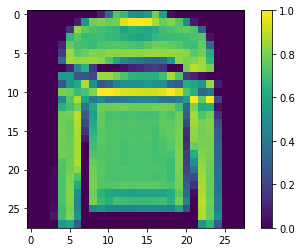

In [10]:
visualize_example(x_train[5])

## 2. Entrenamiento de una red neuronal simple

**Pregunta 2 *(7 puntos)***. Utilizando Keras, y preparando los datos de X e y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de Fashion MNIST con las siguientes características:

* Dos hidden layers de tamaños 128 y 64, utilizando unidades **sigmoid**
* Optimizador **sgd**.
* Durante el entrenamiento, la red tiene que mostrar resultados de **loss** y **accuracy** por cada epoch.
* La red debe entrenar durante **20 epochs** y batch size de **64**.
* La última capa debe de ser una capa **softmax**.

Tu red tendría que ser capaz de superar fácilmente 60% de accuracy.

In [11]:
# Preparación de los datos. Se convierte cada imagen (matriz de 28x28) en un vector (dimensión 28x28 = 784)
#  para utilizarlo como entrada en nuestra red neuronal
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [12]:
#Definición del modelo de la NN
model = tf.keras.Sequential([
    #tf.keras.layers.Flatten(input_shape=(28,28,1)),       # Transforms 28x28 pixels images into 784 array
    # Se define la primera capa oculta junto con la información de la capa de entrada
    tf.keras.layers.Dense(128, activation=tf.nn.sigmoid, input_dim=784), # 128 neurons (sigmoid) + input 784 array
    # Se define la siguiente capa oculta
    tf.keras.layers.Dense(64, activation=tf.nn.sigmoid),  # 64 neurons (sigmoid)
    # Se define la capa de salida
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)   # 10-node softmax layer in %
])

#Definición del optimizador, función de pérdida y métrica de evaluación
model.compile(optimizer="sgd",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
)
# se puede modificar el optimizador de acuerdo a parámetros personalizados o dejarlo por defecto
#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

#Entrenamiento del modelo (train set) con 20 epochs y batch size de 64
model.fit(x_train, y_train,
          epochs=20,
          batch_size=64
)

Epoch 1/20
60000/60000 [==============================] - 3s 42us/sample - loss: 2.3265 - accuracy: 0.0628
Epoch 2/20
60000/60000 [==============================] - 2s 40us/sample - loss: 2.2895 - accuracy: 0.1512
Epoch 3/20
60000/60000 [==============================] - 2s 39us/sample - loss: 2.2711 - accuracy: 0.2938
Epoch 4/20
60000/60000 [==============================] - 2s 37us/sample - loss: 2.2526 - accuracy: 0.4180
Epoch 5/20
60000/60000 [==============================] - 2s 38us/sample - loss: 2.2333 - accuracy: 0.4811
Epoch 6/20
60000/60000 [==============================] - 2s 37us/sample - loss: 2.2130 - accuracy: 0.5056
Epoch 7/20
60000/60000 [==============================] - 2s 37us/sample - loss: 2.1912 - accuracy: 0.5293
Epoch 8/20
60000/60000 [==============================] - 2s 37us/sample - loss: 2.1677 - accuracy: 0.5651
Epoch 9/20
60000/60000 [==============================] - 2s 39us/sample - loss: 2.1419 - accuracy: 0.5726
Epoch 10/20
60000/60000 [============

Se puede comprobar que con los parámetros definidos para nuestra red neuronal obtenemos al final de las 20 epochs un loss alrededor de 1.68 y una accuracy de 0.61. Nota: estos valores pueden cambiar ligeramente si se entrena de nuevo la red neuronal.

## 3. Evaluación del modelo en datos de test

Una vez hemos entrenado nuestro modelo, vamos a evaluarlo en los datos de test de Fashion MNIST.

**Pregunta 3.1 *(1 punto)***. Utilizando el modelo recién entrenado, obtener la accuracy resultante en el dataset de test.

In [13]:
# Evaluación del modelo en el test set
score = model.evaluate(x_test, y_test)#, batch_size=64)

10000/10000 [==============================] - 0s 44us/sample - loss: 1.6664 - accuracy: 0.6116


Los valores obtenidos son los siguientes:

loss: 1.66 y accuracy: 0.61

Se debe mencionar que estos valores se modifican si la red ha sido entrenada nuevamente.

**Pregunta 3.2 *(1 punto)***. Utilizando el método **predict** de Keras, realizar predicciones para los datos de test. Por cada predicción resultante, ¿qué significan los números que obtenemos al hacer predict? ¿Cómo podemos obtener el valor de la clase resultante? (recordar que estamos utilizando una capa softmax para clasificar).

In [14]:
# Usando el método predict
predictions = model.predict(x_test)
index=70
print("Índice: ", index)
print("Salida softmax: ", predictions[index])
print("Categoría predicha: ", np.argmax(predictions[index]))
print("Categoría real: ", y_test[index])

Índice:  70
Salida softmax:  [0.0390121  0.03933978 0.04398944 0.04289856 0.03666027 0.22376285
 0.05665616 0.2588855  0.12712261 0.1316727 ]
Categoría predicha:  7
Categoría real:  7


Al aplicar el método predict, el resultado es un vector de dimesión 10, el cual representa la predicción en función de la probabilidad de pertenencia a cada categoría. Como se definió en la teoría de la materia, la suma de estos valores es igual a 1 (se presenta en resultado como porcentajes o probabilidades). 

El valor de la clase resultante se lo obtiene mediante el método _np.argmax_ que nos devuelve la posición (categoría) con mayor valor de probabilidad.

Se definió la red neuronal según las características solicitadas y se comprobó lo visto en la teoría. Se obtuvieron los resultados esperados: alrededor del 60% de accuracy (tanto en el training set como en el test set).

De igual manera se comprobó que el funcionamiento de la función de activación sigmoid no es el adecuado, llegando a tener mejores resultados con una función de activación más idónea (ej. relu) inclusive disminuyendo el tamaño de la red neuronal a solamente una capa oculta, como se puede ver en el modelo a continuación. Además de que se pueden modificar el resto de hiper parámetros.

In [15]:
#Definición del modelo de la NN2
model2 = tf.keras.Sequential([
    #tf.keras.layers.Flatten(input_shape=(28,28,1)),       # Transforms 28x28 pixels images into 784 array
    # Se define la primera capa oculta junto con la información de la capa de entrada
    tf.keras.layers.Dense(128, activation=tf.nn.relu, input_dim=784), # 128 neurons (sigmoid) + input 784 array
    # Se define la capa de salida
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)   # 10-node softmax layer in %
])

#Definición del optimizador, función de pérdida y métrica de evaluación
model2.compile(optimizer="sgd",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
)

#Entrenamiento del modelo (train set) con 20 epochs y batch size de 64
model2.fit(x_train, y_train,
          epochs=15,
          batch_size=64
)

print("=========================Test set=========================")

# Evaluación del modelo en el test set
score = model2.evaluate(x_test, y_test)#, batch_size=64)

Epoch 1/15
60000/60000 [==============================] - 2s 38us/sample - loss: 1.7708 - accuracy: 0.4658
Epoch 2/15
60000/60000 [==============================] - 2s 38us/sample - loss: 1.1727 - accuracy: 0.6687
Epoch 3/15
60000/60000 [==============================] - 3s 42us/sample - loss: 0.9561 - accuracy: 0.7099
Epoch 4/15
60000/60000 [==============================] - 2s 37us/sample - loss: 0.8488 - accuracy: 0.7350
Epoch 5/15
60000/60000 [==============================] - 2s 37us/sample - loss: 0.7834 - accuracy: 0.7524
Epoch 6/15
60000/60000 [==============================] - 2s 37us/sample - loss: 0.7378 - accuracy: 0.7654
Epoch 7/15
60000/60000 [==============================] - 2s 37us/sample - loss: 0.7034 - accuracy: 0.7759
Epoch 8/15
60000/60000 [==============================] - 2s 37us/sample - loss: 0.6762 - accuracy: 0.7836
Epoch 9/15
60000/60000 [==============================] - 2s 38us/sample - loss: 0.6541 - accuracy: 0.7904
Epoch 10/15
60000/60000 [============